# This notebook seeks to demonstrate the presence of some shockingly labelled images in the _80M Tiny Images_ dataset

Data required: 
- The raw images binfileName='tiny_images.bin' - 227 GB from http://horatio.cs.nyu.edu/mit/tiny/data/index.html
- Index data (7Mb) which has been processed to 'df_classes_tiny_images_3.csv' by tiny_images_1_index.ipynb

In [1]:
#function library for tiny image dataset
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
# import Image
from PIL import Image

In [2]:
os.getcwd()

'/home/shared/ImageNet_Vinay'

In [3]:
url='https://raw.githubusercontent.com/vinayprabhu/Fun_random/master/Datasets/df_classes_tiny_images_3.csv'
df_tiny=pd.read_csv(url) # This csv file should now be in the assets folder
df_tiny.shape

(75846, 3)

In [4]:
def fetch_offset_N(df_tiny,class_label):
    ind_class=np.where(df_tiny.class_name==class_label)[0][0]
    offset_class= df_tiny.loc[0:max(0,ind_class-1),'n_images'].values.sum()
    n_images_class=df_tiny.loc[ind_class,'n_images']
    return offset_class,n_images_class

offset_class,n_images_class=fetch_offset_N(df_tiny,'nigger')
offset_class,n_images_class

(48205396, 1904)

In [5]:
df_tiny.head()

,class_ind,class_name,n_images
0,0,a-bomb,2426
1,1,a-horizon,1866
2,2,a-line,2184
3,3,a._a._michelson,1045
4,4,a._a._milne,1599


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


(-0.5, 31.5, 31.5, -0.5)

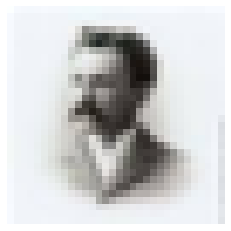

In [6]:
BinfileName='tiny_images.bin'
#Check for 
with open(BinfileName, mode='rb') as file: # b is important -> binary
    indx=6477
    offset = indx * 3072
    file.seek(offset)
    data = file.read(10*32*32*3)
    data=np.fromstring(data, dtype='uint8')
    t = data.reshape(32,32,3,10, order="F").copy()
plt.imshow(t[:,:,:,3])    
plt.axis('off')    

In [7]:
def plot_images(class_label,df_tiny,BinfileName='tiny_images.bin',N=25,in_class_offset=0):
    """
    Function to plot the first n images of the class:
    """

    offset_class,n_images_class=fetch_offset_N(df_tiny,class_label)
    n=min(N,n_images_class)


    with open(BinfileName, mode='rb') as file: # b is important -> binary
        offset = int(offset_class+in_class_offset) * 3072
        file.seek(offset)
        data = file.read(n*32*32*3)
        data=np.fromstring(data, dtype='uint8')
        X_out = data.reshape(32,32,3,n, order="F").copy()

    m=int(np.sqrt(n))
    plt.figure(figsize=(5,5))
    for i in range(n):
        plt.subplot(m,m,i+1)
        plt.imshow(X_out[:,:,:,i],interpolation='nearest')
        plt.axis('off')
    plt.suptitle(f'First {n} images of with label:{class_label}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f'tiny_images_{class_label[0:3]}.pdf',bbox_inches='tight')



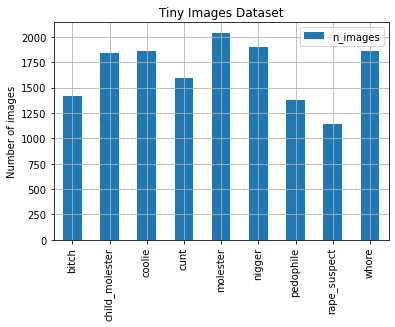

In [8]:
offensive_list=['nigger','coolie','cunt','bitch','whore','rape_suspect','pedophile','molester','child_molester']
df_offensive=df_tiny.loc[df_tiny.class_name.isin(offensive_list),['class_name','n_images']]
df_offensive.reset_index(inplace=True,drop=True)
df_offensive.plot(kind='bar')
plt.xticks(np.arange(df_offensive.shape[0]),list(df_offensive.class_name.values),rotation=90);
plt.ylabel('Number of images')
plt.title('Tiny Images Dataset')
plt.grid('On')
plt.savefig('count_tiny_images.pdf',bbox_inches='tight')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer i

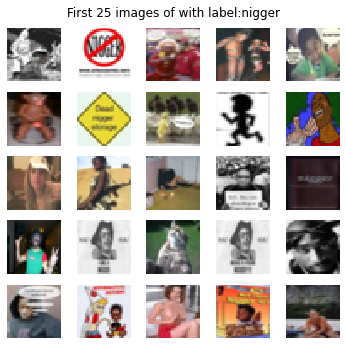

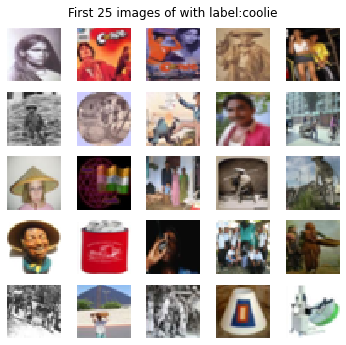

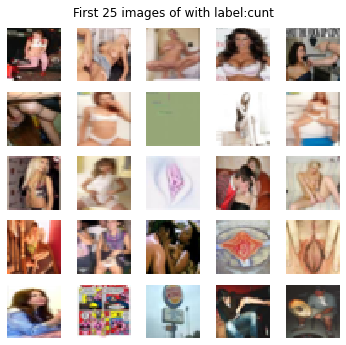

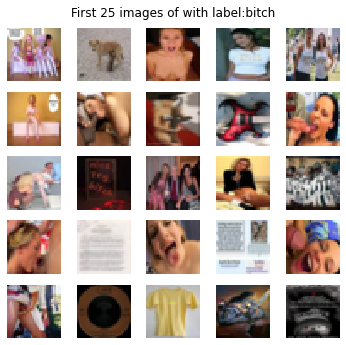

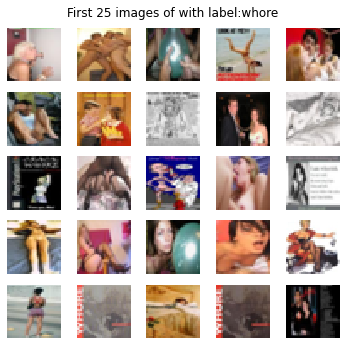

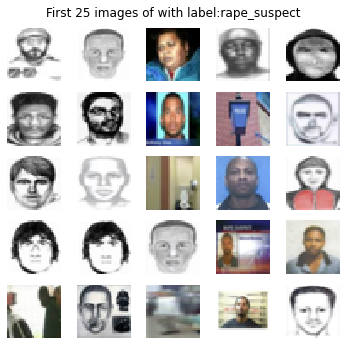

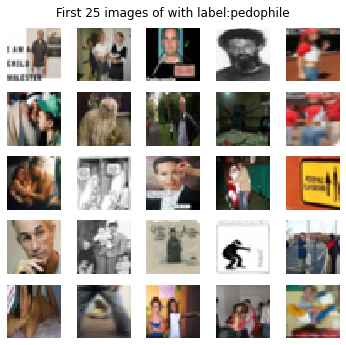

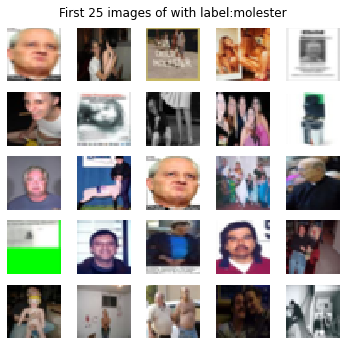

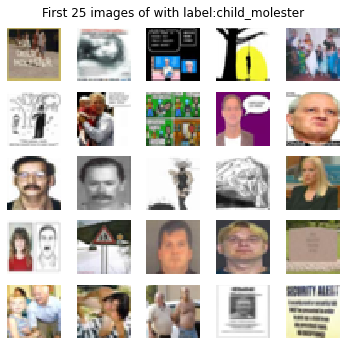

In [9]:
for word_label in offensive_list:
    plot_images(word_label,df_tiny,BinfileName='tiny_images.bin',N=25,in_class_offset=0)